In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
df_power = pd.read_csv(r'C:\Users\JAMES TECH\Downloads\powerconsumption.csv',index_col=['Datetime'],parse_dates=['Datetime']).resample('H').mean()

In [3]:
df=df_power.copy()

In [4]:
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,29197.974683,18026.747720,19252.048193
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,24657.215190,16078.419453,17042.891567
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973,14330.699088,15676.144578
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240,13219.452887,14883.855422
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367,12921.580547,14317.108433


In [5]:
df.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3'],
      dtype='object')

In [6]:
df.dtypes

Temperature               float64
Humidity                  float64
WindSpeed                 float64
GeneralDiffuseFlows       float64
DiffuseFlows              float64
PowerConsumption_Zone1    float64
PowerConsumption_Zone2    float64
PowerConsumption_Zone3    float64
dtype: object

In [7]:
df.isnull().sum()

Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8736 entries, 2017-01-01 00:00:00 to 2017-12-30 23:00:00
Freq: H
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             8736 non-null   float64
 1   Humidity                8736 non-null   float64
 2   WindSpeed               8736 non-null   float64
 3   GeneralDiffuseFlows     8736 non-null   float64
 4   DiffuseFlows            8736 non-null   float64
 5   PowerConsumption_Zone1  8736 non-null   float64
 6   PowerConsumption_Zone2  8736 non-null   float64
 7   PowerConsumption_Zone3  8736 non-null   float64
dtypes: float64(8)
memory usage: 614.2 KB


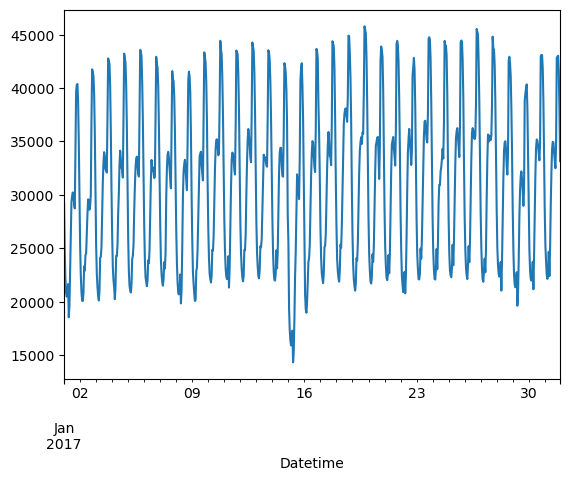

In [9]:
# plot the first 31 days using powerconsumption zone1
df['PowerConsumption_Zone1'].iloc[:744].plot();

* The data above is noisy
* each hour of the day has a different pattern

######  Decomposition

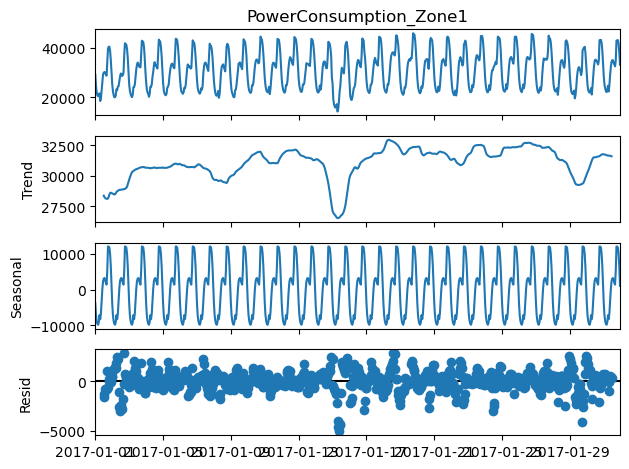

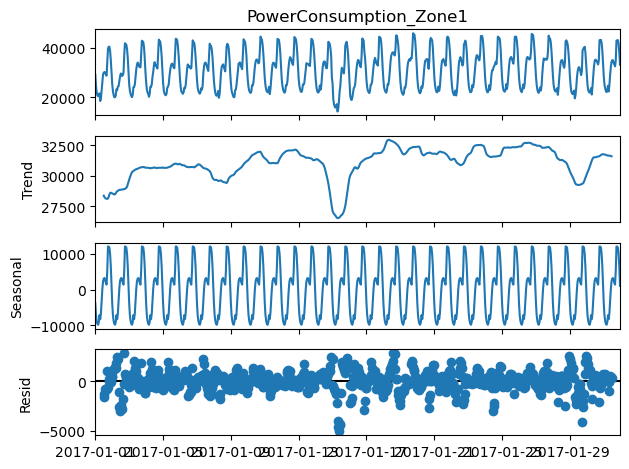

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(df['PowerConsumption_Zone1'].iloc[:744], period = (24))

results.plot()

###### Linear Regression

In [13]:
df_lr = df_power.copy()

In [14]:
df_lr = df_lr['PowerConsumption_Zone1'].reset_index()
df_lr = df_lr.assign(
    trend = df_lr.index,
    hour = df_lr['Datetime'].dt.hour.astype('string'),
    
).set_index('Datetime')

df_lr.head()

,PowerConsumption_Zone1,trend,hour
Datetime,,,
2017-01-01 00:00:00,29197.974683,0,0
2017-01-01 01:00:00,24657.215190,1,1
2017-01-01 02:00:00,22083.037973,2,2
2017-01-01 03:00:00,20811.139240,3,3
2017-01-01 04:00:00,20475.949367,4,4


In [15]:
# getting dummies

df_dummies = pd.get_dummies(df_lr, drop_first= True)*1

df_dummies.head()

,PowerConsumption_Zone1,trend,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,...,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,29197.974683,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-01 01:00:00,24657.215190,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-01 02:00:00,22083.037973,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-01 03:00:00,20811.139240,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2017-01-01 04:00:00,20475.949367,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8736 entries, 2017-01-01 00:00:00 to 2017-12-30 23:00:00
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PowerConsumption_Zone1  8736 non-null   float64
 1   trend                   8736 non-null   int64  
 2   hour_1                  8736 non-null   int32  
 3   hour_10                 8736 non-null   int32  
 4   hour_11                 8736 non-null   int32  
 5   hour_12                 8736 non-null   int32  
 6   hour_13                 8736 non-null   int32  
 7   hour_14                 8736 non-null   int32  
 8   hour_15                 8736 non-null   int32  
 9   hour_16                 8736 non-null   int32  
 10  hour_17                 8736 non-null   int32  
 11  hour_18                 8736 non-null   int32  
 12  hour_19                 8736 non-null   int32  
 13  hour_2                  8736 non-null   int32  
 14  hour

In [17]:
reg_df = df_dummies.copy()

In [18]:
reg_df.head()

,PowerConsumption_Zone1,trend,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,...,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,29197.974683,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-01 01:00:00,24657.215190,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-01 02:00:00,22083.037973,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-01 03:00:00,20811.139240,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2017-01-01 04:00:00,20475.949367,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
reg_df.columns

Index(['PowerConsumption_Zone1', 'trend', 'hour_1', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_2', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9'],
      dtype='object')

######  Data Splitting

In [20]:
reg_train = reg_df.loc[:'2017-01-31']
reg_test = reg_df.loc['2017-02-01':'2017-02-03']

x_train = sm.add_constant(reg_train.drop('PowerConsumption_Zone1',axis = 1))
y_train = reg_train['PowerConsumption_Zone1']

x_test = sm.add_constant(reg_test.drop('PowerConsumption_Zone1',axis = 1))
y_test = reg_test['PowerConsumption_Zone1']


In [21]:
# fit the model
model = sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     PowerConsumption_Zone1   R-squared:                       0.951
Model:                                OLS   Adj. R-squared:                  0.949
Method:                     Least Squares   F-statistic:                     577.4
Date:                    Sun, 15 Sep 2024   Prob (F-statistic):               0.00
Time:                            08:25:31   Log-Likelihood:                -6558.4
No. Observations:                     744   AIC:                         1.317e+04
Df Residuals:                         719   BIC:                         1.328e+04
Df Model:                              24                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.634e+04    314.697     83.687      0.000    2.57e+04     2.7e+04
trend          2.7642      0.283      9.763      0.000       2.208       3.320
hour_1     -3371.1268    421.061     -8.006      0.000   -4197.783   -2544.471
hour_10     3722.1664    421.070      8.840      0.000    2895.492    4548.841
hour_11     5958.7162    421.072     14.151      0.000    5132.038    6785.394
hour_12     6754.9721    421.075     16.042      0.000    5928.290    7581.655
hour_13     6920.6359    421.077     16.436      0.000    6093.949    7747.323
hour_14     6197.7084    421.079     14.719      0.000    5371.016    7024.401
hour_15     5565.0054    421.082     13.216      0.000    4738.308    6391.703
hour_16     5048.1049    421.085     11.988      0.000    4221.401    5874.808
hour_17     8939.2729    421.088     21.229      0.000    8112.563    9765.983
hour_18      1.57e+04    421.092     37.293      0.000    1.49e+04    1.65e+04
hour_19     1.567e+04    421.095     37.206      0.000    1.48e+04    1.65e+04
hour_2     -5008.9746    421.061    -11.896      0.000   -5835.631   -4182.318
hour_20     1.541e+04    421.099     36.587      0.000    1.46e+04    1.62e+04
hour_21     1.365e+04    421.103     32.405      0.000    1.28e+04    1.45e+04
hour_22     1.012e+04    421.107     24.041      0.000    9297.105     1.1e+04
hour_23     4757.7226    421.111     11.298      0.000    3930.968    5584.477
hour_3     -5816.3121    421.062    -13.813      0.000   -6642.969   -4989.655
hour_4     -6086.6794    421.062    -14.456      0.000   -6913.338   -5260.021
hour_5     -5378.3288    421.063    -12.773      0.000   -6204.989   -4551.669
hour_6     -3451.3910    421.064     -8.197      0.000   -4278.053   -2624.729
hour_7     -4639.4880    421.065    -11.018      0.000   -5466.153   -3812.823
hour_8     -3015.4331    421.067     -7.161      0.000   -3842.101   -2188.765
hour_9       422.0968    421.069      1.002      0.316    -404.574    1248.768
==============================================================================
Omnibus:                      300.491   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1597.209
Skew:                          -1.762   Prob(JB):                         0.00
Kurtosis:                       9.254   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

######  Key Fact;
* The TREND = 2.756 indicates that on average, electricity increases by 2.756kw per hour.
* The negative pattern shows the extreme consumption when people are awake while the positive pattern shows that people are asleep and cannot consume excess.
* The negative pattern continue until when peple are asleep that's by 9pm

######  Scorring The Model

In [22]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

In [24]:
print("MAE:",mae(y_test,model.predict(x_test)))
print('')
print("MAPE:",mape(y_test,model.predict(x_test)))

MAE: 1016.8138495938706

MAPE: 0.03272545074532815


In [25]:
#plot
test_preds = pd.DataFrame({
    "actuals":y_test.values,
    'predicted':model.predict(x_test)
})

test_preds.head(50)

,actuals,predicted
Datetime,,
2017-02-01 00:00:00,28172.542372,28392.726555
2017-02-01 01:00:00,25288.474577,25024.363958
2017-02-01 02:00:00,23351.186440,23389.280250
2017-02-01 03:00:00,22359.661017,22584.706955
2017-02-01 04:00:00,22213.220338,22317.103852
2017-02-01 05:00:00,22843.728813,23028.218592
2017-02-01 06:00:00,24146.440677,24957.920512
2017-02-01 07:00:00,21052.881357,23772.587723
2017-02-01 08:00:00,23725.423727,25399.406833


<Axes: xlabel='Datetime'>

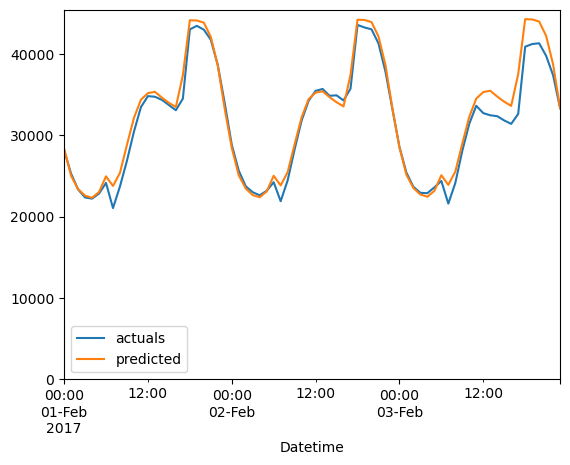

In [26]:
test_preds.plot(ylim=0)

######  Adding Week Days

In [27]:
df_lr = df_lr['PowerConsumption_Zone1'].reset_index()
df_lr = df_lr.assign(
    trend = df_lr.index,
    hour = df_lr['Datetime'].dt.hour.astype('string'),
    day_of_week = df_lr['Datetime'].dt.dayofweek.astype('string'),
    
).set_index('Datetime')

df_lr.head()

,PowerConsumption_Zone1,trend,hour,day_of_week
Datetime,,,,
2017-01-01 00:00:00,29197.974683,0,0,6
2017-01-01 01:00:00,24657.215190,1,1,6
2017-01-01 02:00:00,22083.037973,2,2,6
2017-01-01 03:00:00,20811.139240,3,3,6
2017-01-01 04:00:00,20475.949367,4,4,6


In [28]:
# getting dummies

df_dumm = pd.get_dummies(df_lr, drop_first= True)*1

df_dumm.head()

,PowerConsumption_Zone1,trend,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,...,hour_6,hour_7,hour_8,hour_9,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,29197.974683,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2017-01-01 01:00:00,24657.215190,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2017-01-01 02:00:00,22083.037973,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2017-01-01 03:00:00,20811.139240,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2017-01-01 04:00:00,20475.949367,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
days_df = df_dumm.copy()

In [30]:
reg_train = days_df.loc[:'2017-01-31']
reg_test = days_df.loc['2017-02-01':'2017-02-03']

x_train = sm.add_constant(reg_train.drop('PowerConsumption_Zone1',axis = 1))
y_train = reg_train['PowerConsumption_Zone1']

x_test = sm.add_constant(reg_test.drop('PowerConsumption_Zone1',axis = 1))
y_test = reg_test['PowerConsumption_Zone1']


In [31]:
# fit the model
model = sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     PowerConsumption_Zone1   R-squared:                       0.967
Model:                                OLS   Adj. R-squared:                  0.966
Method:                     Least Squares   F-statistic:                     698.8
Date:                    Sun, 15 Sep 2024   Prob (F-statistic):               0.00
Time:                            08:32:15   Log-Likelihood:                -6407.6
No. Observations:                     744   AIC:                         1.288e+04
Df Residuals:                         713   BIC:                         1.302e+04
Df Model:                              30                                         
Covariance Type:                nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.615e+04    282.121     92.684      0.000    2.56e+04    2.67e+04
trend             2.6556      0.234     11.369      0.000       2.197       3.114
hour_1        -3371.0182    345.273     -9.763      0.000   -4048.891   -2693.145
hour_10        3723.2524    345.281     10.783      0.000    3045.364    4401.141
hour_11        5959.9108    345.282     17.261      0.000    5282.019    6637.802
hour_12        6756.2753    345.284     19.567      0.000    6078.380    7434.170
hour_13        6922.0476    345.286     20.047      0.000    6244.149    7599.947
hour_14        6199.2287    345.288     17.954      0.000    5521.326    6877.132
hour_15        5566.6344    345.290     16.122      0.000    4888.727    6244.542
hour_16        5049.8424    345.293     14.625      0.000    4371.930    5727.755
hour_17        8941.1191    345.296     25.894      0.000    8263.202    9619.037
hour_18        1.571e+04    345.298     45.484      0.000     1.5e+04    1.64e+04
hour_19        1.567e+04    345.301     45.379      0.000     1.5e+04    1.63e+04
hour_2        -5008.7574    345.273    -14.507      0.000   -5686.631   -4330.884
hour_20        1.541e+04    345.304     44.624      0.000    1.47e+04    1.61e+04
hour_21        1.365e+04    345.308     39.525      0.000     1.3e+04    1.43e+04
hour_22        1.013e+04    345.311     29.325      0.000    9448.293    1.08e+04
hour_23        4760.2204    345.314     13.785      0.000    4082.266    5438.175
hour_3        -5815.9863    345.273    -16.845      0.000   -6493.860   -5138.112
hour_4        -6086.2450    345.274    -17.627      0.000   -6764.120   -5408.370
hour_5        -5377.7858    345.275    -15.575      0.000   -6055.662   -4699.909
hour_6        -3450.7395    345.276     -9.994      0.000   -4128.618   -2772.861
hour_7        -4638.7278    345.277    -13.435      0.000   -5316.608   -3960.847
hour_8        -3014.5643    345.278     -8.731      0.000   -3692.447   -2336.682
hour_9          423.0741    345.279      1.225      0.221    -254.811    1100.959
day_of_week_1   617.9034    175.580      3.519      0.000     273.189     962.618
day_of_week_2  1018.2609    186.325      5.465      0.000     652.449    1384.072
day_of_week_3  1155.0124    186.156      6.205      0.000     789.532    1520.493
day_of_week_4   729.9074    186.156      3.921      0.000     364.427    1095.388
day_of_week_5   267.5239    186.325      1.436      0.152     -98.288     633.335
day_of_week_6 -1745.7600    175.580     -9.943      0.000   -2090.475   -1401.045
==============================================================================
Omnibus:                      176.885   Durbin-Watson:                   0.313
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              798.371
Skew:         

In [32]:
print("MAE:",mae(y_test,model.predict(x_test)))
print('')
print("MAPE:",mape(y_test,model.predict(x_test)))

MAE: 1526.1010631747647

MAPE: 0.049334052633092505


In [33]:
#plot
re_preds = pd.DataFrame({
    "actuals":y_test.values,
    'predicted':model.predict(x_test)
})

re_preds.head(20)

,actuals,predicted
Datetime,,
2017-02-01 00:00:00,28172.542372,29142.075405
2017-02-01 01:00:00,25288.474577,25773.712808
2017-02-01 02:00:00,23351.186440,24138.629100
2017-02-01 03:00:00,22359.661017,23334.055805
2017-02-01 04:00:00,22213.220338,23066.452702
2017-02-01 05:00:00,22843.728813,23777.567442
2017-02-01 06:00:00,24146.440677,25707.269362
2017-02-01 07:00:00,21052.881357,24521.936573
2017-02-01 08:00:00,23725.423727,26148.755683


<Axes: xlabel='Datetime'>

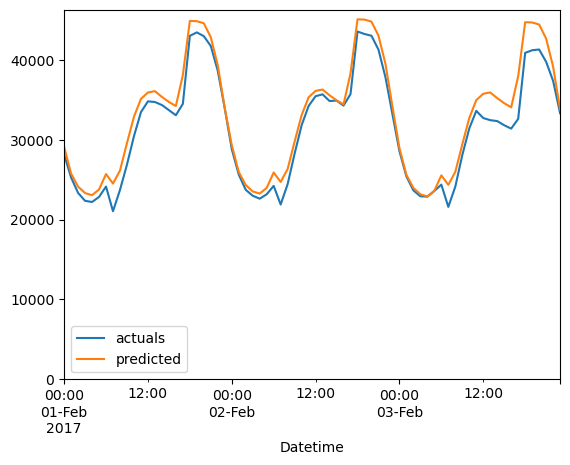

In [34]:
re_preds.plot(ylim=0)

###### FaceBook Prophet

In [37]:
from prophet import Prophet

In [36]:
df_fbook = df_dummies.copy()

In [38]:
df_fb = (
     df_fbook
    .reset_index()
    .rename({'Datetime':'ds','PowerConsumption_Zone1':'y'},axis = 1)
)

In [39]:
df_fb.head()

,ds,y,trend,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,...,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9
0,2017-01-01 00:00:00,29197.974683,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-01-01 01:00:00,24657.215190,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-01-01 02:00:00,22083.037973,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-01-01 03:00:00,20811.139240,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2017-01-01 04:00:00,20475.949367,4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
df_fb_train = df_fb.query("ds<'2017-02-01'")
df_fb_test = df_fb.query("'2017-02-01' <= ds < '2017-02-04'")

In [41]:
df_fb_test.tail()

,ds,y,trend,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,...,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9
811,2017-02-03 19:00:00,41218.983052,811,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
812,2017-02-03 20:00:00,41316.610170,812,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
813,2017-02-03 21:00:00,39773.898305,813,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
814,2017-02-03 22:00:00,37381.016948,814,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
815,2017-02-03 23:00:00,33327.457627,815,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [42]:
# fit the model
model = Prophet()
model.fit(df_fb_train[['ds','y']])

08:36:54 - cmdstanpy - INFO - Chain [1] start processing
08:36:56 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
# Mkaing predictions

future = model.make_future_dataframe(periods = 72, freq ='H')
forecast = model.predict(future)

forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01 00:00:00,29655.899289,23005.595498,26560.672428,29655.899289,29655.899289,-4837.862383,-4837.862383,-4837.862383,-3393.998693,-3393.998693,-3393.998693,-1443.863690,-1443.863690,-1443.863690,0.0,0.0,0.0,24818.036906
1,2017-01-01 01:00:00,29662.309584,19365.666368,23048.974019,29662.309584,29662.309584,-8367.456152,-8367.456152,-8367.456152,-6834.680333,-6834.680333,-6834.680333,-1532.775818,-1532.775818,-1532.775818,0.0,0.0,0.0,21294.853432
2,2017-01-01 02:00:00,29668.719878,17365.646072,21054.869801,29668.719878,29668.719878,-10540.516145,-10540.516145,-10540.516145,-8924.479597,-8924.479597,-8924.479597,-1616.036549,-1616.036549,-1616.036549,0.0,0.0,0.0,19128.203733
3,2017-01-01 03:00:00,29675.130173,16562.696477,20420.315203,29675.130173,29675.130173,-11341.708476,-11341.708476,-11341.708476,-9648.737353,-9648.737353,-9648.737353,-1692.971123,-1692.971123,-1692.971123,0.0,0.0,0.0,18333.421697
4,2017-01-01 04:00:00,29681.540468,16724.073424,20179.333453,29681.540468,29681.540468,-11156.444422,-11156.444422,-11156.444422,-9393.493132,-9393.493132,-9393.493132,-1762.951290,-1762.951290,-1762.951290,0.0,0.0,0.0,18525.096046


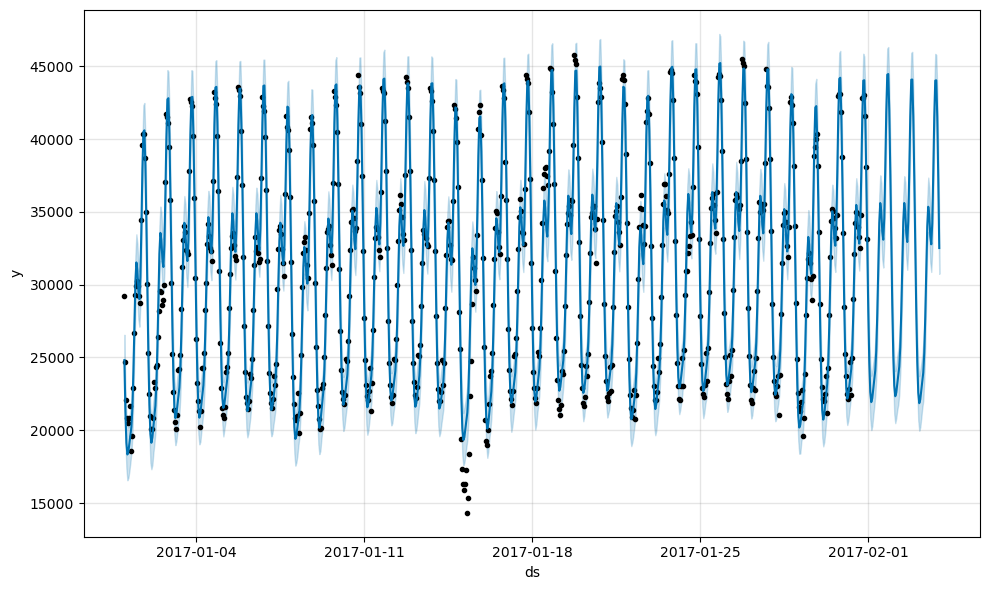

In [44]:
#plot
model.plot(forecast);

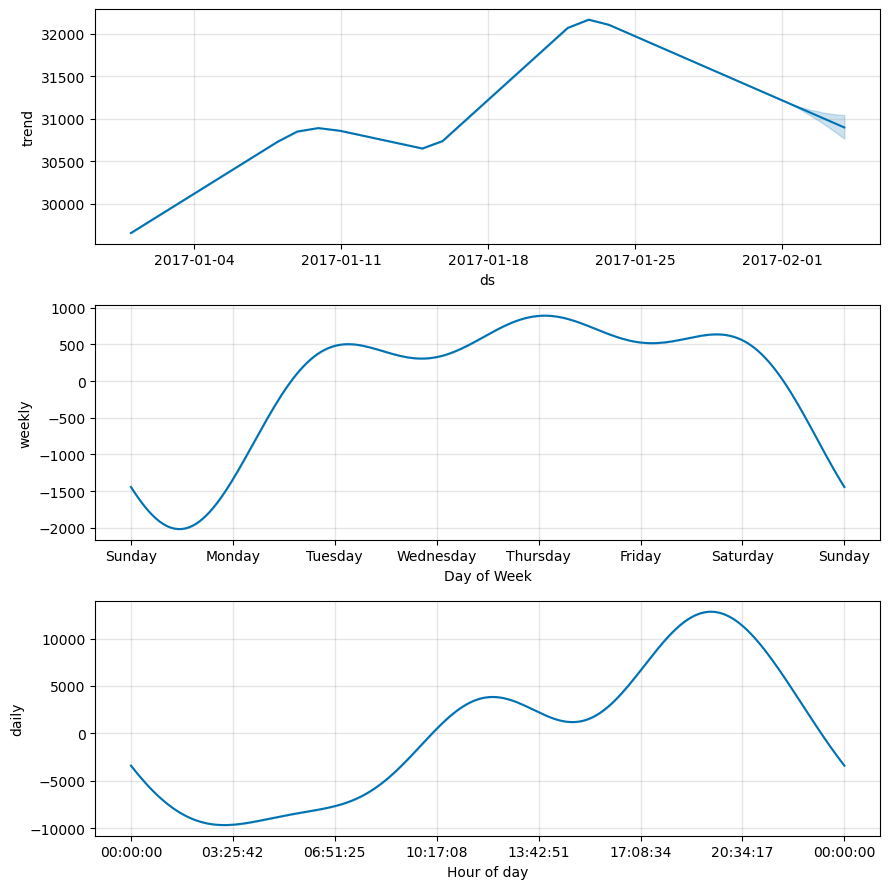

In [45]:
model.plot_components(forecast);

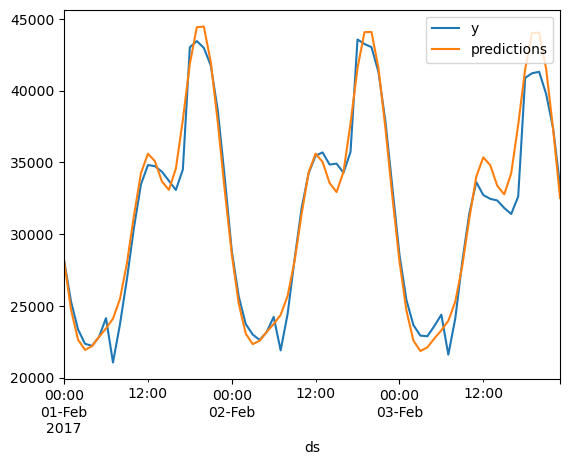

In [46]:
#score the model

df_fb_score = (
    df_fb_test
    .assign(predictions = model.predict(future)['yhat'])
    .set_index('ds')
    .loc[:,['y', 'predictions']]
)


df_fb_score.plot();

In [47]:
df_fb_score.head(20)

,y,predictions
ds,,
2017-02-01 00:00:00,28172.542372,28150.031237
2017-02-01 01:00:00,25288.474577,24717.785695
2017-02-01 02:00:00,23351.186440,22639.502718
2017-02-01 03:00:00,22359.661017,21929.687948
2017-02-01 04:00:00,22213.220338,22202.101970
2017-02-01 05:00:00,22843.728813,22841.565957
2017-02-01 06:00:00,24146.440677,23430.937096
2017-02-01 07:00:00,21052.881357,24113.038650
2017-02-01 08:00:00,23725.423727,25485.270131


In [48]:
#score the prophet

print('The actual score(MAE):',mae(df_fb_score['y'], df_fb_score['predictions']))
print('')
print('The percentage error(MAPE):',mape(df_fb_score['y'], df_fb_score['predictions']))

The actual score(MAE): 1048.181166754559

The percentage error(MAPE): 0.03444932604083992
